# Automatic Differentiation


$\hat{y} = \sigma(\textbf{h}^T\textbf{q} + c), \textbf{h} = ReLU(\textbf{W}\textbf{x} + \textbf{b})$

$W= \begin{pmatrix}
   1 & 1 \\
   -1 & -1
\end{pmatrix},
q = \begin{pmatrix}
   1  \\
   -1
\end{pmatrix},
b = \begin{pmatrix}
   -0.5  \\
   1.5
\end{pmatrix},
c = -1.5,
x = \begin{pmatrix}
   0  \\
   0
\end{pmatrix}
$

## Q1

$\textbf{W}\textbf{x} = \begin{pmatrix}
   0  \\
   0
\end{pmatrix}$

$\textbf{W}\textbf{x} + \textbf{b} = \begin{pmatrix}
   0  \\
   0
\end{pmatrix} + \begin{pmatrix}
   -0.5  \\
   1.5
\end{pmatrix}
= \begin{pmatrix}
   -0.5  \\
   1.5
\end{pmatrix}$

よって

$\textbf{h} = ReLU(\textbf{W}\textbf{x} + \textbf{b}) = \begin{pmatrix}
   0  \\
   1.5
\end{pmatrix}$

また、
$\textbf{h}^T\textbf{q} + c = \begin{pmatrix}
   0 & 1.5
\end{pmatrix}\begin{pmatrix}
   1  \\
   -1
\end{pmatrix} - 1.5 = -3.0$

より
$\hat{y} = \sigma(\textbf{h}^T\textbf{q} + c) = 1 / (1 + e^{3.0}) \fallingdotseq 4.7 \times 10^{-2}$

## Q2
二値クロスエントロピーの値は

$l_{x,y}(\textbf{w}) = - log(1 - p)$

$= - log(e^{3.0}/(1 + e^{3.0}))$

$= log(1 + e^{3.0}) - 3.0 \fallingdotseq 1.3$

$\frac{\partial l}{\partial l} = 1$

$\frac{\partial l}{\partial p} = \frac{\partial }{\partial p}(- log(1 - p)) = 1 / (1 - p) = (1 + e^{3.0})/e^{3.0} \fallingdotseq 1.0$

$\frac{\partial l}{\partial \alpha} = \frac{\partial l}{\partial p}\frac{\partial p}{\partial \alpha} = (1 + e^{3.0})/e^{3.0} \times (e^{3.0} / (1 + e^{3.0})^2) = 1 / (1 + e^{3.0}) \fallingdotseq 4.7 \times 10^{-2}$ 

$\frac{\partial l}{\partial c} = \frac{\partial l}{\partial \alpha} \frac{\partial \alpha}{\partial c} = 1 / (1 + e^{3.0}) \fallingdotseq 4.7 \times 10^{-2}$

$\frac{\partial l}{\partial q} = \frac{\partial l}{\partial \alpha} \frac{\partial \alpha}{\partial q} = 1 / (1 - p) \times \textbf{h} = (1 + e^{3.0})/e^{3.0} \ times \begin{pmatrix}
   0  \\
   1.5
\end{pmatrix} \fallingdotseq \begin{pmatrix}
   0  \\
   7.1 \times 10^{-2}
\end{pmatrix}$

$\frac{\partial l}{\partial h} = \frac{\partial l}{\partial \alpha} \frac{\partial \alpha}{\partial h} = 1 / (1 - p) \times \textbf{q} = (1 + e^{3.0})/e^{3.0} \ times \begin{pmatrix}
   1  \\
   -1
\end{pmatrix} \fallingdotseq \begin{pmatrix}
   4.7 \times 10^{-2}  \\
   -4.7 \times 10^{-2}
\end{pmatrix}$


$\frac{\partial l}{\partial b_{1}} = \frac{\partial l}{\partial h_{1}} \frac{\partial h_{1}}{\partial b_{1}} \fallingdotseq
   4.7 \times 10^{-2}$

$\frac{\partial l}{\partial b_{2}} = \frac{\partial l}{\partial h_{2}} \frac{\partial h_{2}}{\partial b_{2}} \fallingdotseq 0$

ゆえに

$\frac{\partial l}{\partial b} \fallingdotseq \begin{pmatrix}
   4.7 \times 10^{-2}  \\
   0
\end{pmatrix}$

$\frac{\partial l}{\partial w_1} = \frac{\partial l}{\partial h_{1}} \frac{\partial h_{1}}{\partial w_1} = 4.7 \times 10^{-2} \times 0 = 0$
以下同様のため

$\frac{\partial l}{\partial W} = \begin{pmatrix}
   0 & 0 \\
   0 & 0
\end{pmatrix}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import gzip
import sys
import struct
import urllib.request

def read_image(fi):
    magic, n, rows, columns = struct.unpack(">IIII", fi.read(16))
    assert magic == 0x00000803
    assert rows == 28
    assert columns == 28
    rawbuffer = fi.read()
    assert len(rawbuffer) == n * rows * columns
    rawdata = np.frombuffer(rawbuffer, dtype='>u1', count=n*rows*columns)
    return rawdata.reshape(n, rows, columns).astype(np.float32) / 255.0

def read_label(fi):
    magic, n = struct.unpack(">II", fi.read(8))
    assert magic == 0x00000801
    rawbuffer = fi.read()
    assert len(rawbuffer) == n
    return np.frombuffer(rawbuffer, dtype='>u1', count=n)

def openurl_gzip(url):
    request = urllib.request.Request(
        url,
        headers={
            "Accept-Encoding": "gzip",
            "User-Agent": "Mozilla/5.0 (X11; U; Linux i686) Gecko/20071127 Firefox/2.0.0.11", 
        })
    response = urllib.request.urlopen(request)
    return gzip.GzipFile(fileobj=response, mode='rb')

if __name__ == '__main__':
    np.savez_compressed(
        'mnist',
        train_x=read_image(openurl_gzip('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')),
        train_y=read_label(openurl_gzip('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')),
        test_x=read_image(openurl_gzip('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')),
        test_y=read_label(openurl_gzip('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'))
    )

In [3]:
data = np.load('mnist.npz')

print("Training data (X):", data['train_x'].shape, data['train_x'].dtype)
print("Training data (Y):", data['train_y'].shape, data['train_y'].dtype)
print("Test data (X):", data['test_x'].shape, data['test_x'].dtype)
print("Test data (Y):", data['test_y'].shape, data['test_y'].dtype)

Training data (X): (60000, 28, 28) float32
Training data (Y): (60000,) uint8
Test data (X): (10000, 28, 28) float32
Test data (Y): (10000,) uint8


In [17]:
def images_to_vectors(X):
    X = np.reshape(X, (len(X), -1))         # Flatten: (N x 28 x 28) -> (N x 784)
    return np.c_[X, np.ones(len(X))]        # Append 1: (N x 784) -> (N x 785)

def preprocess_y(Y):
  return np.array([[1 if i == y else 0 for i in range(10)] for y in Y])

In [18]:
X_train = images_to_vectors(data['train_x'])
Y_train = preprocess_y(data['train_y'])
X_test = images_to_vectors(data['test_x'])
Y_test = preprocess_y(data['test_y'])

In [62]:
# Q1

BATCHSIZE = 4
MAXREPEATNUM = 50

from torch.utils.data import TensorDataset, DataLoader
import torch


dtype = torch.float
X = torch.from_numpy(X_train).type(dtype)
Y = torch.from_numpy(Y_train.reshape(len(Y_train), 10)).type(dtype)
test_X = torch.from_numpy(X_test).type(dtype)
test_Y = torch.from_numpy(Y_test.reshape(len(Y_test), 10)).type(dtype)
train_dataset = TensorDataset(X, Y)
loader = DataLoader(train_dataset, batch_size=BATCHSIZE, shuffle=True)
test_dataset = TensorDataset(test_X, test_Y)
test_loader = DataLoader(test_dataset, batch_size=BATCHSIZE, shuffle=True)
model = torch.nn.Sequential(
    torch.nn.Linear(785, 10, bias=True),
)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)


train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []
N = X.shape[0]
test_N = test_X.shape[0]
for t in range(MAXREPEATNUM):
    ok_count = 0
    test_ok_count = 0
    for x, y in loader:
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    for x, y in loader:
        y_hat = model(x)
        for i in range(BATCHSIZE):
          y_hat_max_index = (y_hat[i] == max(y_hat[i])).nonzero(as_tuple=True)[0]
          if y[i][y_hat_max_index] == 1:
            ok_count += 1
    train_losses.append(loss.detach().numpy())
    train_accuracy.append(ok_count/N)
    for x, y in test_loader:
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
        for i in range(BATCHSIZE):
          y_hat_max_index = (y_hat[i] == max(y_hat[i])).nonzero(as_tuple=True)[0]
          if y[i][y_hat_max_index] == 1:
            test_ok_count += 1
    test_losses.append(loss.detach().numpy())
    test_accuracy.append(test_ok_count/test_N)

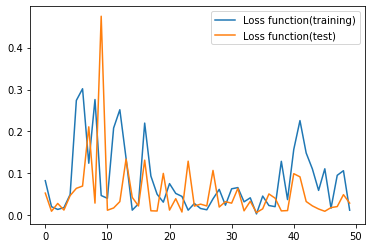

In [63]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(MAXREPEATNUM)], train_losses, label="Loss function(training)")
plt.plot([i for i in range(MAXREPEATNUM)], test_losses, label="Loss function(test)")

plt.legend()
plt.show()

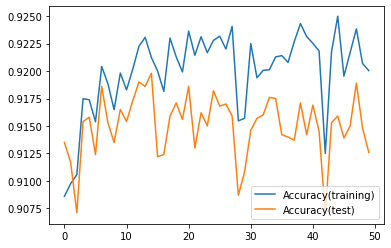

In [66]:

plt.plot([i for i in range(MAXREPEATNUM)], train_accuracy, label="Accuracy(training)")
plt.plot([i for i in range(MAXREPEATNUM)], test_accuracy, label="Accuracy(test)")

plt.legend()
plt.show()

In [110]:
# Q2, Q3
test_result = np.array([[0 for j in range(10)] for i in range(10)])
for x, y in test_loader:
    y_hat = model(x)
    for i in range(BATCHSIZE):
      y_hat_max_index = (y_hat[i] == max(y_hat[i])).nonzero(as_tuple=True)[0]
      y_positive = (y[i] == 1).nonzero(as_tuple=True)[0]
      test_result[y_hat_max_index][y_positive] += 1
column_sum = np.sum(test_result, axis=0)
column_sum = np.insert(column_sum, 10, np.sum(column_sum, axis=0))
row_sum = np.sum(test_result, axis=1)
test_result = np.insert(test_result, 10, row_sum, axis=0)
test_result = np.insert(test_result, 10, column_sum, axis=1)
recall = []
precision = []
for i in range(10):
  precision.append(test_result[i][i] / test_result[i][-1])
  recall.append(test_result[i][i] / test_result[-1][i])
recall += ['-', '-']
precision += ['-']
recall = np.array(recall)
precision = np.array(precision)
test_result = test_result.astype(np.str)
test_result = np.insert(test_result, 11, precision, axis=0)
test_result = np.insert(test_result, 11, recall, axis=1)



<ipython-input-110-09dbcaca2487>:23: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_result = test_result.astype(np.str)


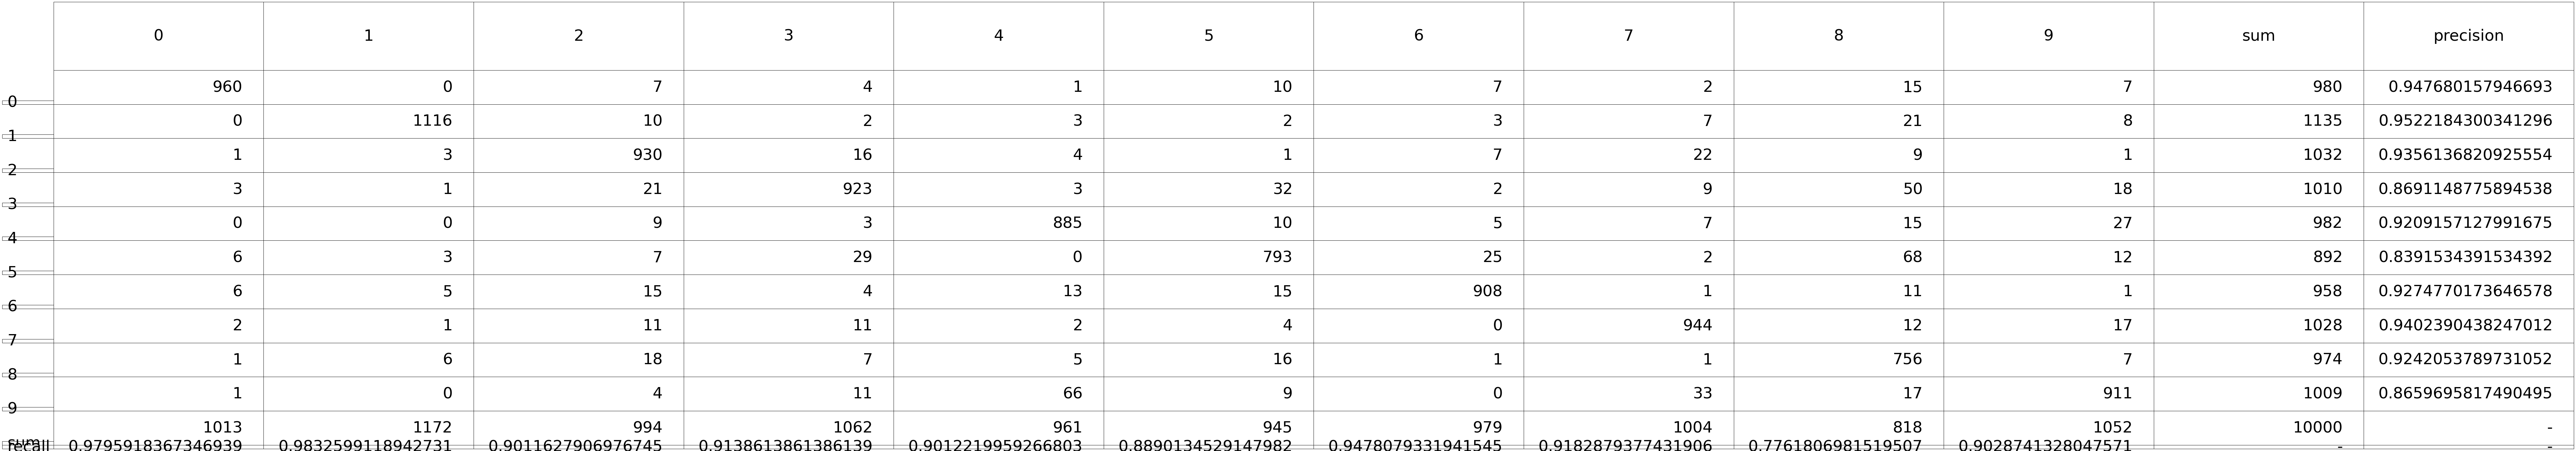

In [143]:
axis1 = np.array([i for i in range(10)] + ['sum', 'precision'])
axis2 = np.array([i for i in range(10)] + ['sum', 'recall'])

fig, ax = plt.subplots(1, 1)

ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=test_result, colLabels=axis1, colWidths=[2]*12, rowLabels=axis2, loc="center", fontsize=20)
cellDict = table.get_celld()
for i in range(0,12):
    cellDict[(0,i)].set_height(1)
    for j in range(1,12):
        cellDict[(j,i)].set_height(0.5)
table.set_fontsize(500)
ax.axis('tight')
ax.axis('off')
plt.show() # 混同行列の出力

In [158]:
F1_scores = []
print("# F1 Score")
for i in range(10):
  P = float(precision[i])
  R = float(recall[i])
  F1 = 2 * P * R / (P + R)
  print(f"Class {i}: {F1}")
  F1_scores.append(F1)
print("")
f_precision = np.array([float(p) for p in precision[:10]])
f_recall = np.array([float(r) for r in recall[:10]])
F1_scores = np.array(F1_scores)

Macro_P = np.average(f_precision)
Macro_R = np.average(f_recall)
Macro_F1 = np.average(F1_scores)
print(f"Macro P: {Macro_P}")
print(f"Macro R: {Macro_R}")
print(f"Macro F1 : {Macro_F1}")

# F1 Score
Class 0: 0.9633718013045661
Class 1: 0.9674902470741222
Class 2: 0.9180651530108589
Class 3: 0.8909266409266409
Class 4: 0.9109624292331446
Class 5: 0.8633641807294502
Class 6: 0.9375322663913268
Class 7: 0.9291338582677166
Class 8: 0.84375
Class 9: 0.8840368753032508

Macro P: 0.9113262076200787
Macro R: 0.9122587321526952
Macro F1 : 0.9108633452241077


In [290]:
# Q4
import heapq

ys = []
counter = 0
def softmax(a):
    a= a.detach().numpy()
    ea = np.exp(a - np.max(a))
    return ea / ea.sum()

for x, y in test_loader:
    y_hat = model(x)
    for i in range(BATCHSIZE):
      y_hat_max_index = (y_hat[i] == max(y_hat[i])).nonzero(as_tuple=True)[0]
      y_positive = (y[i] == 1).nonzero(as_tuple=True)[0]
      ys.append([counter, int(y_positive), softmax(y_hat[i])[y_positive], int(y_hat_max_index), softmax(y_hat[i])[y_hat_max_index], x[i]])
      counter += 1


In [292]:

positives = [y for y in ys if y[1] == y[3]]
negatives = [y for y in ys if y[1] != y[3]]
most_postive = sorted(positives, key=lambda x: x[4], reverse=True)[:3]
most_negative = sorted(negatives, key=lambda x: x[4])[:3]

In [293]:
print("# correct")
for i in range(3):
  num, y, p_y, y_hat, p_y_hat = positives[i][:5]
  print(f'No: {num}, y: {y}, p_y: {p_y}, y_hat: {y_hat}, p_y_hat: {p_y_hat}')

print("")
print("# incorrect")
for i in range(3):
  num, y, p_y, y_hat, p_y_hat = negatives[i][:5]
  print(f'No: {num}, y: {y}, p_y: {p_y}, y_hat: {y_hat}, p_y_hat: {p_y_hat}')

# correct
No: 0, y: 4, p_y: 0.9995123147964478, y_hat: 4, p_y_hat: 0.9995123147964478
No: 2, y: 6, p_y: 1.0, y_hat: 6, p_y_hat: 1.0
No: 3, y: 3, p_y: 0.9685576558113098, y_hat: 3, p_y_hat: 0.9685576558113098

# incorrect
No: 1, y: 4, p_y: 0.2909177243709564, y_hat: 9, p_y_hat: 0.6801981925964355
No: 13, y: 8, p_y: 0.24211974442005157, y_hat: 1, p_y_hat: 0.690352201461792
No: 29, y: 8, p_y: 0.022432377561926842, y_hat: 5, p_y_hat: 0.9773455858230591


In [320]:
from PIL import Image
from IPython.display import Image as ip_image
import cv2

def make_image(instance):
  processed_x = np.reshape(np.array([round(float(bit) * 255) for bit in instance[5][1:]], dtype=np.uint8), (28, 28))
  return Image.fromarray(processed_x, mode="L")
pil_img = make_image(positives[0])
pil_img

In [321]:
pil_img = make_image(positives[1])
pil_img

In [322]:
pil_img = make_image(positives[2])
pil_img

In [323]:
pil_img = make_image(negatives[0])
pil_img

In [324]:
pil_img = make_image(negatives[1])
pil_img

In [326]:
pil_img = make_image(negatives[2])
pil_img

In [329]:
# Q5

BATCHSIZE = 4
MAXREPEATNUM = 5

from torch.utils.data import TensorDataset, DataLoader
import torch


dtype = torch.float
X = torch.from_numpy(X_train).type(dtype)
Y = torch.from_numpy(Y_train.reshape(len(Y_train), 10)).type(dtype)
test_X = torch.from_numpy(X_test).type(dtype)
test_Y = torch.from_numpy(Y_test.reshape(len(Y_test), 10)).type(dtype)
train_dataset = TensorDataset(X, Y)
loader = DataLoader(train_dataset, batch_size=BATCHSIZE, shuffle=True)
test_dataset = TensorDataset(test_X, test_Y)
test_loader = DataLoader(test_dataset, batch_size=BATCHSIZE, shuffle=True)
model = torch.nn.Sequential(
    torch.nn.Linear(785, 100, bias=True),
    torch.nn.Sigmoid(),
    torch.nn.Linear(100, 10, bias=True),
)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)


train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []
N = X.shape[0]
test_N = test_X.shape[0]
for t in range(MAXREPEATNUM):
    ok_count = 0
    test_ok_count = 0
    for x, y in loader:
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    for x, y in loader:
        y_hat = model(x)
        for i in range(BATCHSIZE):
          y_hat_max_index = (y_hat[i] == max(y_hat[i])).nonzero(as_tuple=True)[0]
          if y[i][y_hat_max_index] == 1:
            ok_count += 1
    train_losses.append(loss.detach().numpy())
    train_accuracy.append(ok_count/N)
    for x, y in test_loader:
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
        for i in range(BATCHSIZE):
          y_hat_max_index = (y_hat[i] == max(y_hat[i])).nonzero(as_tuple=True)[0]
          if y[i][y_hat_max_index] == 1:
            test_ok_count += 1
    test_losses.append(loss.detach().numpy())
    test_accuracy.append(test_ok_count/test_N)

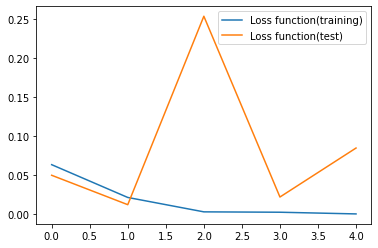

In [331]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(MAXREPEATNUM)], train_losses, label="Loss function(training)")
plt.plot([i for i in range(MAXREPEATNUM)], test_losses, label="Loss function(test)")

plt.legend()
plt.show()

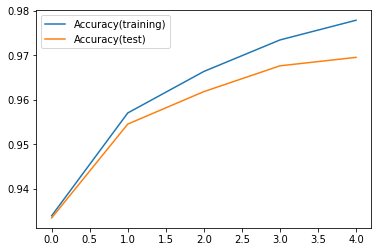

In [333]:

plt.plot([i for i in range(MAXREPEATNUM)], train_accuracy, label="Accuracy(training)")
plt.plot([i for i in range(MAXREPEATNUM)], test_accuracy, label="Accuracy(test)")

plt.legend()
plt.show()